In [1]:
%help

Welcome message.
Lorem ipsum dolor sit amet.


In [1]:
%status

My node ID: 0xa20a85ccc2318553598ffe703aec14931b4c3473
My wallet address: 0xa20a85ccc2318553598ffe703aec14931b4c3473
On Polygon[mainnet]: 0.00 GLM 0.0000 MATIC
On Rinkeby[testnet]: 999.89 tGLM 0.0001 tETH
Connection status: Disconnected



In [2]:
%budget rinkeby 1

Allocated 1 tglm on rinkeby

In [40]:
%connect timeout=15m

Progress: 1/3
    Demand created. Waiting for counter proposal.
    Searching for just any machine...
    Will try to connect for 15 minutes.
Progress: 2/3
    Agreement created.
    Connected to imapp2035-3060-1 [0x85f08a865abc7adf5f56754cd390a951406439eb]
    RAM: 6.589084774255753 GB
    DISK: 200.6771881103516 GB
    CPU: 4 cores
    GPU: GA106 [GeForce RTX 3060 Lite Hash Rate]
Progress: 3/3
    Engine is starting...
Ready.

In [41]:
%pip install matplotlib pandas










Note: you may need to restart the kernel to use updated packages.


In [42]:
%upload california_housing_train.csv

Sending...
File uploaded.


In [10]:
!lspci -vnn | grep VGA

00:02.0 VGA compatible controller [0300]: Device [1234:1111] (rev 02) (prog-if 00 [VGA controller])
00:05.0 VGA compatible controller [0300]: NVIDIA Corporation Device [10de:2504] (rev a1) (prog-if 00 [VGA controller])


In [12]:
!nvidia-smi

Wed May 10 18:12:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.60.02    Driver Version: 510.60.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:00:05.0 Off |                  N/A |
|  0%   58C    P0    33W / 170W |      0MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [71]:
import numpy as np
import pandas as pd
import random

training_df = pd.read_csv(filepath_or_buffer="workdir/california_housing_train.csv")

training_df['median_house_value'] /= 1000.0

# create dummy data for training
x_values = list(training_df['total_rooms'])[:10]
# x_values = [i for i in range(15)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = list(training_df['median_house_value'])[:10]
# y_values = [2*i + 1 + random.randint(-4,4) for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()
    
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [72]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(21969.1133, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 21969.11328125
tensor(1.3847e+15, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 1384708462084096.0
tensor(9.5214e+25, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 9.521359818284276e+25
tensor(6.5470e+36, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 6.546957094486822e+36
tensor(inf, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss inf
tensor(inf, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss inf
tensor(inf, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss inf
tensor(inf, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss inf
tensor(inf, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss inf
tensor(nan, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss nan
tensor(nan, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 10, loss nan
tensor(nan, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 11, loss nan
tensor(n

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


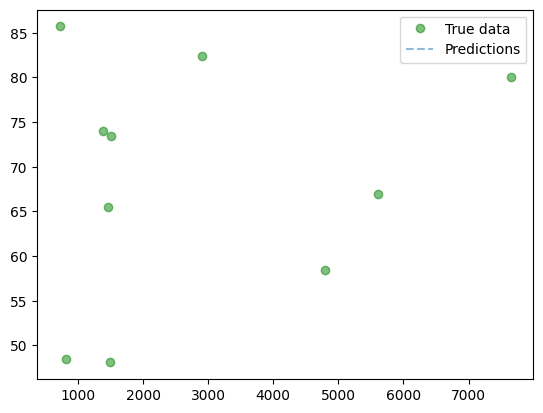

In [73]:
from matplotlib import pyplot as plt

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
plt.savefig('workdir/plot1.png')

In [ ]:
from IPython.display import Image, display

display(Image('workdir/plot1.png'))

In [ ]:
%download plot1.png

In [74]:
%disconnect

Disconnecting... done.
Total cost: 0.008526519623534722
Allocated 0.982552694920630555 tglm on rinkeby